In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.getcwd()

'/Users/ashwinivalmiki/Downloads'

In [6]:
df=pd.read_csv('/Users/ashwinivalmiki/Downloads/Position_Salaries.csv')

In [10]:
df.drop(['Position'],axis=1)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [11]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X=df['Level']

In [22]:
X=X.values.reshape(-1,1)

In [23]:
y=df['Salary']

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
linear=LinearRegression()

In [27]:
linear.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Salary')

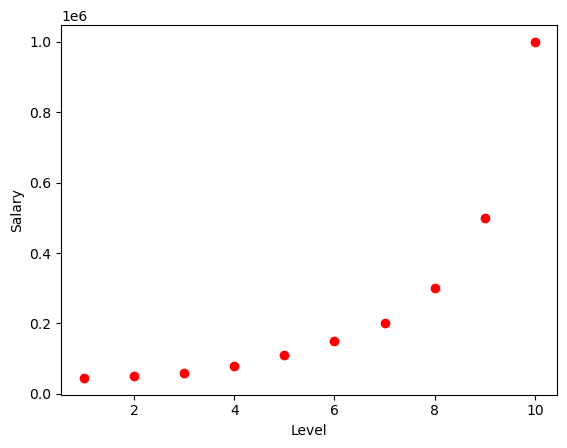

In [33]:
plt.scatter(df['Level'],df['Salary'],color='r')
plt.xlabel("Level")
plt.ylabel("Salary")

In [34]:
y_train_predict=linear.predict(X_train)

In [38]:
X_data=pd.DataFrame({'Actual':y_train,'Predicted':y_train_predict})

In [39]:
X_data

,Actual,Predicted
0,45000,-138799.504950
7,300000,485915.841584
2,60000,39690.594059
9,1000000,664405.940594
4,110000,218180.693069
3,80000,128935.643564
6,200000,396670.792079


In [40]:
linear.intercept_

-228044.55445544567

In [41]:
linear.coef_

array([89245.04950495])

In [63]:
r2_score(y_train,y_train_predict)

0.6625138227248093

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
poly=PolynomialFeatures(degree=2)

In [68]:
X1_train=poly.fit_transform(X_train)

In [69]:
X1_test=poly.fit_transform(X_test)

In [70]:
linear.fit(X1_train,y_train)

LinearRegression()

In [71]:
y_train_polypred=linear.predict(X1_train)

In [72]:
X1_data=pd.DataFrame({'y_actual':y_train,'y_ploypredicted':y_train_polypred})

In [73]:
X1_data

,y_actual,y_ploypredicted
0,45000,114994.954591
7,300000,440996.468214
2,60000,1917.484634
9,1000000,905337.125034
4,110000,53816.622328
3,80000,7244.977525
6,200000,270692.367673


In [74]:
r2_score(y_train,y_train_polypred)*100

92.71279767918048

In [75]:
# data is in non linear format so polynomial linear regression is providing higher 
#accuracy than simple linear regression.

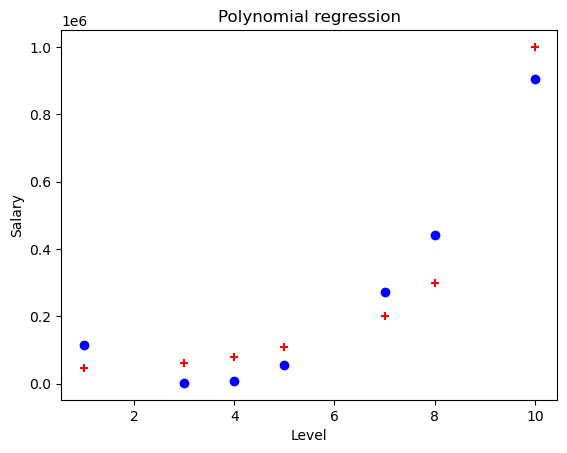

In [79]:
plt.title('Polynomial regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X_train,y_train,color='r',marker="+")
plt.scatter(X_train,y_train_polypred,color='b',marker='o')
plt.show()